In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import permutations
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('spotify_taylorswift.csv') #Reading the csv
df.head() #Printing the first five rows of the csv

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [6]:
df1 = df
a = df1['album'].unique()
print(sorted(a))

['1989 (Deluxe)', "Fearless (Taylor's Version)", 'Lover', 'Red (Deluxe Edition)', 'Speak Now (Deluxe Package)', 'Taylor Swift', 'evermore (deluxe version)', 'folklore (deluxe version)', 'reputation']


In [8]:
df = df.drop(df.loc[df['popularity'] <=10].index)
df = df.reset_index()
df = df.drop('index', axis=1)

##### The most popular Taylor Swift songs are: 

In [9]:
most_pop = df.loc[df['popularity'] >=80]
most_pop

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,231826,82,0.760,0.1030,0.703,0.000000,0.0913,-5.412,0.0540,0.570,95.997
64,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,219200,80,0.647,0.0647,0.800,0.000000,0.3340,-5.384,0.1650,0.942,160.078
92,Lover,Lover,Taylor Swift,2019-08-23,221306,80,0.359,0.4920,0.543,0.000016,0.1180,-7.582,0.0919,0.453,68.534


##### The least popular Taylor Swift songs are:

In [10]:
least_pop= df.loc[df['popularity'] <=45]
least_pop

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
15,Mine - POP Mix,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,230546,45,0.696,0.00461,0.768,0.000001,0.101,-3.863,0.0308,0.692,121.050
22,Never Grow Up,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,290480,44,0.715,0.82900,0.308,0.000000,0.160,-8.829,0.0305,0.547,124.899
25,Innocent,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,302266,44,0.553,0.20200,0.604,0.000000,0.125,-5.295,0.0258,0.186,133.989
35,Back To December,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,293040,43,0.525,0.11300,0.676,0.000000,0.294,-4.684,0.0294,0.281,141.950


In [11]:
df.corr().ix['popularity', :-1]

length             -0.266131
popularity          1.000000
danceability        0.206527
acousticness        0.013458
energy             -0.058886
instrumentalness    0.032275
liveness           -0.146958
loudness           -0.260964
speechiness         0.308866
valence             0.070943
Name: popularity, dtype: float64

##### Plotting the pearson correlation for popularity we can see that speechiness and danceability are the only features slightly correlated.

In [12]:
pop_data = df.groupby('album').mean().sort_values(['popularity'],ascending=False)
pop_data = pop_data.reset_index()

Text(0.5, 1.0, 'Album vs Popularity')

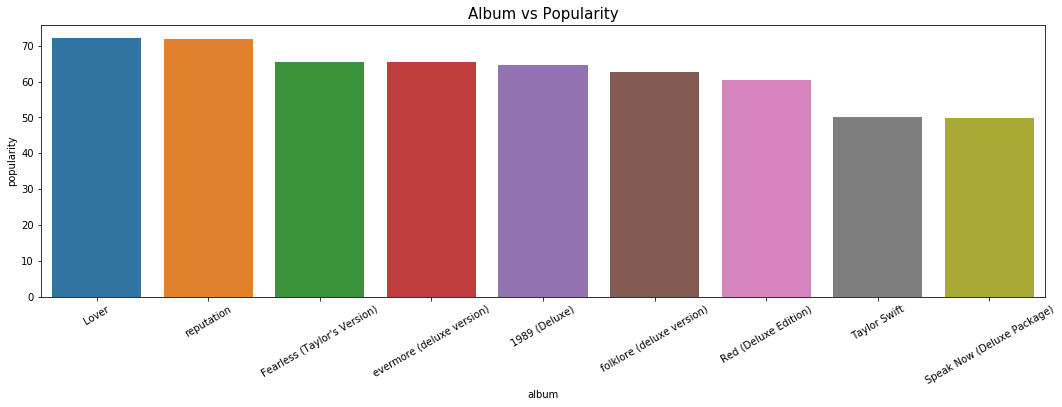

In [13]:
plt.figure(figsize=(18, 5))
sns.barplot(x='album', y='popularity', data=pop_data)
sns.set_palette("bright")
locs, labels = plt.xticks()
plt.setp(labels, rotation=30) 
plt.title('Album vs Popularity', fontsize=15)

##### The most popular albums are Lover, reputation and fearless (TV)

In [14]:
df_song = df.sort_values(by=['popularity'], ascending=False)
df_new = df_song.drop_duplicates(subset = "album")

In [15]:
df_new

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,231826,82,0.760,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997
92,Lover,Lover,Taylor Swift,2019-08-23,221306,80,0.359,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534
79,Delicate,reputation,Taylor Swift,2017-11-10,232253,78,0.750,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045
147,You Belong With Me (Taylor’s Version),Fearless (Taylor's Version),Taylor Swift,2021-04-09,231124,76,0.632,0.06230,0.773,0.000000,0.0885,-4.856,0.0346,0.4740,130.033
41,All Too Well,Red (Deluxe Edition),Taylor Swift,2012-10-22,329160,72,0.602,0.03820,0.609,0.000200,0.1280,-7.803,0.0243,0.3370,93.060
140,right where you left me - bonus track,evermore (deluxe version),Taylor Swift,2021-01-07,245026,72,0.581,0.76900,0.619,0.000106,0.1170,-6.524,0.0282,0.6450,137.915
109,cardigan,folklore (deluxe version),Taylor Swift,2020-08-18,239560,65,0.612,0.52500,0.580,0.000414,0.2600,-8.572,0.0419,0.5340,130.045
34,Mine,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,230773,64,0.621,0.00327,0.780,0.000005,0.1840,-2.934,0.0297,0.6720,121.038
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.28800,0.417,0.000000,0.1190,-6.941,0.0231,0.2890,99.953


##### This gives us the most popular song from each album.

In [16]:
df_long = df.sort_values(by=['length'], ascending=False)
df_long.head(1)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
19,Dear John,Speak Now (Deluxe Package),Taylor Swift,2010-01-01,403887,48,0.583,0.183,0.468,0.000002,0.111,-5.378,0.0278,0.126,119.375


###### Dear John is the longest song relased till now.

##### The following gives us the three most positive songs since valence measures the postiveness of a song.

In [18]:
df3 = df.sort_values(by=['valence'], ascending=False)
df3.head(3)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
64,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,219200,80,0.647,0.0647,0.800,0.000000,0.3340,-5.384,0.1650,0.942,160.078
45,Stay Stay Stay,Red (Deluxe Edition),Taylor Swift,2012-10-22,205853,60,0.729,0.3070,0.748,0.000001,0.0962,-6.670,0.0245,0.928,99.981
138,closure,evermore (deluxe version),Taylor Swift,2021-01-07,180653,62,0.689,0.8350,0.704,0.000005,0.1340,-10.813,0.2450,0.920,151.884


In [19]:
df.album.value_counts()

Fearless (Taylor's Version)    26
Speak Now (Deluxe Package)     22
Red (Deluxe Edition)           22
Lover                          18
evermore (deluxe version)      17
folklore (deluxe version)      17
1989 (Deluxe)                  16
reputation                     15
Taylor Swift                   15
Name: album, dtype: int64

Fearless has 26 tracks because it has Vault songs.

In [22]:
df['df4'] = df['acousticness'].groupby(df['album']).transform('mean')
df

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,df4
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,0.182995
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,0.182995
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.000000,0.1190,-6.941,0.0231,0.289,99.953,0.182995
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,0.182995
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.000000,0.1230,-5.769,0.0266,0.261,175.558,0.182995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,277591,74,0.660,0.162,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,0.214061
164,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,244236,65,0.609,0.849,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,0.214061
165,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),Taylor Swift,2021-04-09,189495,67,0.588,0.225,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,0.214061
166,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),Taylor Swift,2021-04-09,208608,66,0.563,0.514,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,0.214061


In [25]:
df4 = df.drop_duplicates(subset = "df4")
df4 = df4.sort_values(by=['df4'], ascending=False)
df4['album']

125      evermore (deluxe version)
108      folklore (deluxe version)
90                           Lover
15      Speak Now (Deluxe Package)
142    Fearless (Taylor's Version)
0                     Taylor Swift
37            Red (Deluxe Edition)
59                   1989 (Deluxe)
75                      reputation
Name: album, dtype: object

###### Most acoustic album is evermore.